In [ ]:
pip install d2l==0.17.0

In [ ]:
import torch
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import math
from torch.utils.data.sampler import SubsetRandomSampler

In [ ]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

# Download and load training data
trainset = datasets.FashionMNIST('./data',download=True, train= True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size= 64, shuffle=True)

# Download and load test data
testset = datasets.FashionMNIST('./data',download=True, train= False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size= 64, shuffle=True)

100%|██████████| 26421880/26421880 [00:01<00:00, 17718116.50it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 274702.95it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 4996203.24it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5659836.70it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


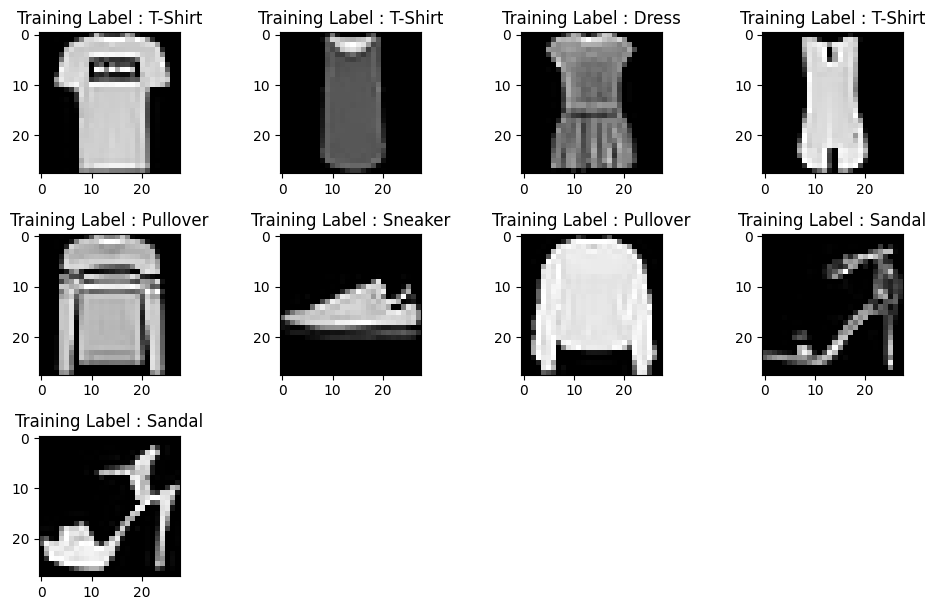

In [ ]:
labels_map = ('T-Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt','Sneaker', 'Bag', 'Ankle Boot')
fig = plt.figure(figsize=(10,10));
columns = 4;
rows = 5;
for i in range(1, 10):
    fig.add_subplot(rows, columns, i)
    fig.tight_layout()
    plt.imshow(trainset.train_data[i].numpy(), cmap='gray')
    plt.title('Training Label : %s' % labels_map[trainset.train_labels[i]])
plt.show()

## Part a

In [ ]:
input_size = 784
out_size = 10

In [ ]:
## Define the model
################ Your code ############
model = nn.Sequential(
    nn.Linear(input_size, 256),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, out_size),
)
#######################################

In [ ]:
################ Your code ############
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)
#######################################

In [ ]:
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.2, inplace=False)
  (3): Linear(in_features=256, out_features=128, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.2, inplace=False)
  (6): Linear(in_features=128, out_features=64, bias=True)
  (7): ReLU()
  (8): Linear(in_features=64, out_features=10, bias=True)
)


In [ ]:
## Train your model
epochs = 10

for e in range(epochs):
  running_loss = 0
  for images, labels in trainloader:

    images = images.view(images.shape[0],-1)

    #reset the default gradients
    optimizer.zero_grad()

    # forward pass
    ################ Your code ############
    output = model(images)
    loss = criterion(output, labels)
    #######################################

    loss.backward()
    optimizer.step()

    running_loss = running_loss+loss.item()
  else:
    print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.6250458441372874
Training loss: 0.41797709244210074
Training loss: 0.37972920659635623
Training loss: 0.35275964931384335
Training loss: 0.3342743981431034
Training loss: 0.3193010955429408
Training loss: 0.3062284154328964
Training loss: 0.29708115294226195
Training loss: 0.28696301066354396
Training loss: 0.27781492680597153


In [ ]:
# Test your model
from d2l import torch as d2l
# d2l.predict_ch3(model,testloader,n = 10)
num_samples = 10
for images, labels in testloader:
    images = images.view(images.shape[0], -1)
    _, predicted = torch.max(model(images), dim=1)
    for i in range(num_samples):
        print("Predicted label:", predicted[i].item())
        print("True label:", labels[i].item())
        print()
    break

Predicted label: 1
True label: 1

Predicted label: 7
True label: 7

Predicted label: 7
True label: 7

Predicted label: 6
True label: 6

Predicted label: 2
True label: 6

Predicted label: 8
True label: 8

Predicted label: 7
True label: 7

Predicted label: 0
True label: 0

Predicted label: 0
True label: 0

Predicted label: 3
True label: 1



## Part b

In [ ]:
model = nn.Sequential(
    nn.Linear(input_size, 1024),
    nn.Tanh(),
    nn.Linear(1024, 512),
    nn.ReLU(),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Linear(128, out_size),
)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [ ]:
train_loss_list = []
test_loss_list = []

epochs = 20
for epoch in range(epochs):
    train_loss = 0
    model.train()
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    avg_train_loss = train_loss / len(trainloader)
    train_loss_list.append(avg_train_loss)

    test_loss = 0
    model.eval()
    with torch.no_grad():
        for images, labels in testloader:
            images = images.view(images.shape[0], -1)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
        avg_test_loss = test_loss / len(testloader)
        test_loss_list.append(avg_test_loss)

    print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {avg_train_loss:.4f}, Test Loss: {avg_test_loss:.4f}")


Epoch [1/20], Train Loss: 0.6100, Test Loss: 0.5095
Epoch [2/20], Train Loss: 0.3841, Test Loss: 0.4075
Epoch [3/20], Train Loss: 0.3383, Test Loss: 0.3729
Epoch [4/20], Train Loss: 0.3070, Test Loss: 0.4482
Epoch [5/20], Train Loss: 0.2856, Test Loss: 0.3410
Epoch [6/20], Train Loss: 0.2656, Test Loss: 0.4040
Epoch [7/20], Train Loss: 0.2508, Test Loss: 0.4980
Epoch [8/20], Train Loss: 0.2369, Test Loss: 0.3399
Epoch [9/20], Train Loss: 0.2264, Test Loss: 0.3701
Epoch [10/20], Train Loss: 0.2126, Test Loss: 0.4295
Epoch [11/20], Train Loss: 0.2037, Test Loss: 0.3349
Epoch [12/20], Train Loss: 0.1918, Test Loss: 0.3430
Epoch [13/20], Train Loss: 0.1833, Test Loss: 0.3443
Epoch [14/20], Train Loss: 0.1739, Test Loss: 0.3558
Epoch [15/20], Train Loss: 0.1659, Test Loss: 0.3520
Epoch [16/20], Train Loss: 0.1546, Test Loss: 0.3490
Epoch [17/20], Train Loss: 0.1469, Test Loss: 0.3626
Epoch [18/20], Train Loss: 0.1411, Test Loss: 0.3962
Epoch [19/20], Train Loss: 0.1362, Test Loss: 0.3806
Ep

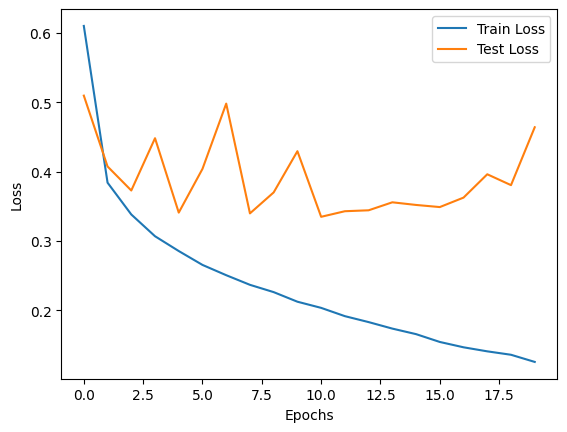

In [ ]:
# Plotting the loss
plt.plot(train_loss_list, label='Train Loss')
plt.plot(test_loss_list, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Part c

In [ ]:
from torchvision.transforms import v2 as transforms

#define data augmentation transforms
augmentation_transform = transforms.Compose([
   transforms.RandomHorizontalFlip(),
   transforms.PILToTensor(),
   transforms.ConvertImageDtype(torch.float),
   transforms.Normalize((0.1307,), (0.3081,)),
   transforms.RandomErasing(),
])
#apply data augmentation to the training dataset
augmented_trainset = datasets.FashionMNIST('./data', train=True, download=True, transform=augmentation_transform)
augmented_trainloader = torch.utils.data.DataLoader(augmented_trainset, batch_size=64, shuffle=True)

In [ ]:
model = nn.Sequential(
    nn.Linear(input_size, 1024),
    nn.Tanh(),
    nn.Linear(1024, 512),
    nn.ReLU(),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Linear(128, out_size),
)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [ ]:
train_loss_list = []
test_loss_list = []

epochs = 10
for epoch in range(epochs):
    train_loss = 0
    model.train()
    for images, labels in augmented_trainloader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    avg_train_loss = train_loss / len(augmented_trainloader)
    train_loss_list.append(avg_train_loss)

    test_loss = 0
    model.eval()
    with torch.no_grad():
        for images, labels in testloader:
            images = images.view(images.shape[0], -1)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
        avg_test_loss = test_loss / len(testloader)
        test_loss_list.append(avg_test_loss)

    print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {avg_train_loss:.4f}, Test Loss: {avg_test_loss:.4f}")

Epoch [1/10], Train Loss: 0.7361, Test Loss: 0.4854
Epoch [2/10], Train Loss: 0.4746, Test Loss: 0.4268
Epoch [3/10], Train Loss: 0.4259, Test Loss: 0.4367
Epoch [4/10], Train Loss: 0.3971, Test Loss: 0.3847
Epoch [5/10], Train Loss: 0.3731, Test Loss: 0.3863
Epoch [6/10], Train Loss: 0.3577, Test Loss: 0.3771
Epoch [7/10], Train Loss: 0.3448, Test Loss: 0.3431
Epoch [8/10], Train Loss: 0.3320, Test Loss: 0.3469
Epoch [9/10], Train Loss: 0.3232, Test Loss: 0.3761
Epoch [10/10], Train Loss: 0.3154, Test Loss: 0.3426


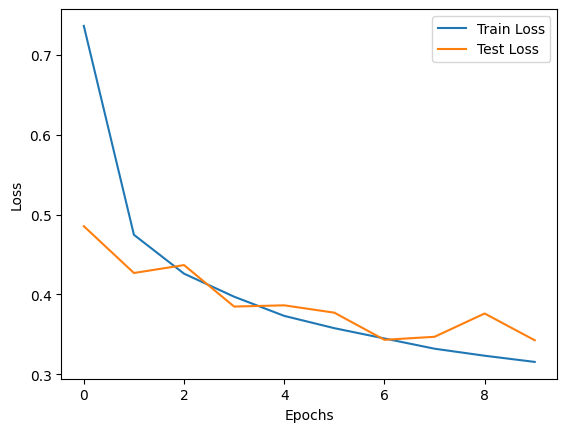

In [ ]:
#plotting the loss
plt.plot(train_loss_list, label='Train Loss')
plt.plot(test_loss_list, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Part d

In [ ]:
model = nn.Sequential(
    nn.Linear(input_size, 1024),
    nn.Tanh(),
    nn.Linear(1024, 512),
    nn.ReLU(),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Linear(128, out_size),
)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)
l1_weight = 0.001

In [ ]:
train_loss_list = []
test_loss_list = []

epochs = 10
for epoch in range(epochs):
    train_loss = 0
    model.train()
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)

        #L1 regularization
        l1_parameters = []
        for parameter in model.parameters():
            l1_parameters.append(parameter.view(-1))
        loss += l1_weight * torch.abs(torch.cat(l1_parameters)).sum()

        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    avg_train_loss = train_loss / len(trainloader)
    train_loss_list.append(avg_train_loss)

    test_loss = 0
    model.eval()
    with torch.no_grad():
        for images, labels in testloader:
            images = images.view(images.shape[0], -1)
            outputs = model(images)
            loss = criterion(outputs, labels)

            #L1 regularization
            l1_parameters = []
            for parameter in model.parameters():
                l1_parameters.append(parameter.view(-1))
            loss += l1_weight * torch.abs(torch.cat(l1_parameters)).sum()

            test_loss += loss.item()
        avg_test_loss = test_loss / len(testloader)
        test_loss_list.append(avg_test_loss)

    print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {avg_train_loss:.4f}, Test Loss: {avg_test_loss:.4f}")

Epoch [1/10], Train Loss: 5.0644, Test Loss: 1.2916
Epoch [2/10], Train Loss: 1.1351, Test Loss: 1.0378
Epoch [3/10], Train Loss: 1.0203, Test Loss: 1.1363
Epoch [4/10], Train Loss: 0.9702, Test Loss: 1.1087
Epoch [5/10], Train Loss: 0.9419, Test Loss: 1.0703
Epoch [6/10], Train Loss: 0.9426, Test Loss: 0.9142
Epoch [7/10], Train Loss: 0.9144, Test Loss: 0.9323
Epoch [8/10], Train Loss: 0.9049, Test Loss: 0.8763
Epoch [9/10], Train Loss: 0.8922, Test Loss: 0.8959
Epoch [10/10], Train Loss: 0.8890, Test Loss: 1.0410


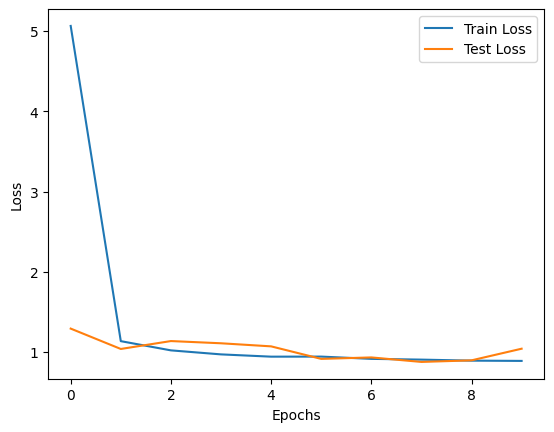

In [ ]:
#plotting the loss
plt.plot(train_loss_list, label='Train Loss')
plt.plot(test_loss_list, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# e(extra)

## Data augmentation and Dropout

In [ ]:
model = nn.Sequential(
    nn.Linear(input_size, 1024),
    nn.Tanh(),
    nn.Dropout(0.2),
    nn.Linear(1024, 512),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Linear(128, out_size),
)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [ ]:
train_loss_list = []
test_loss_list = []

epochs = 10
for epoch in range(epochs):
    train_loss = 0
    model.train()
    for images, labels in augmented_trainloader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    avg_train_loss = train_loss / len(augmented_trainloader)
    train_loss_list.append(avg_train_loss)

    test_loss = 0
    model.eval()
    with torch.no_grad():
        for images, labels in testloader:
            images = images.view(images.shape[0], -1)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
        avg_test_loss = test_loss / len(testloader)
        test_loss_list.append(avg_test_loss)

    print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {avg_train_loss:.4f}, Test Loss: {avg_test_loss:.4f}")

Epoch [1/10], Train Loss: 0.7729, Test Loss: 0.5313
Epoch [2/10], Train Loss: 0.5068, Test Loss: 0.5079
Epoch [3/10], Train Loss: 0.4610, Test Loss: 0.4135
Epoch [4/10], Train Loss: 0.4327, Test Loss: 0.4160
Epoch [5/10], Train Loss: 0.4137, Test Loss: 0.3946
Epoch [6/10], Train Loss: 0.4006, Test Loss: 0.3848
Epoch [7/10], Train Loss: 0.3901, Test Loss: 0.3938
Epoch [8/10], Train Loss: 0.3754, Test Loss: 0.3967
Epoch [9/10], Train Loss: 0.3673, Test Loss: 0.3972
Epoch [10/10], Train Loss: 0.3602, Test Loss: 0.3692


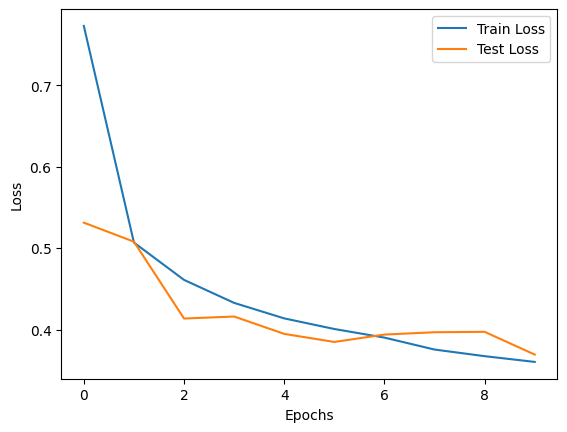

In [ ]:
#plotting the loss
plt.plot(train_loss_list, label='Train Loss')
plt.plot(test_loss_list, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Data augmentation and regularization

In [ ]:
model = nn.Sequential(
    nn.Linear(input_size, 1024),
    nn.Tanh(),
    nn.Linear(1024, 512),
    nn.ReLU(),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Linear(128, out_size),
)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)
l1_weight = 0.001

In [ ]:
train_loss_list = []
test_loss_list = []

epochs = 10
for epoch in range(epochs):
    train_loss = 0
    model.train()
    for images, labels in augmented_trainloader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)

        #L1 regularization
        l1_parameters = []
        for parameter in model.parameters():
            l1_parameters.append(parameter.view(-1))
        loss += l1_weight * torch.abs(torch.cat(l1_parameters)).sum()

        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    avg_train_loss = train_loss / len(augmented_trainloader)
    train_loss_list.append(avg_train_loss)

    test_loss = 0
    model.eval()
    with torch.no_grad():
        for images, labels in testloader:
            images = images.view(images.shape[0], -1)
            outputs = model(images)
            loss = criterion(outputs, labels)

            #L1 regularization
            l1_parameters = []
            for parameter in model.parameters():
                l1_parameters.append(parameter.view(-1))
            loss += l1_weight * torch.abs(torch.cat(l1_parameters)).sum()

            test_loss += loss.item()
        avg_test_loss = test_loss / len(testloader)
        test_loss_list.append(avg_test_loss)

    print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {avg_train_loss:.4f}, Test Loss: {avg_test_loss:.4f}")

Epoch [1/10], Train Loss: 5.2116, Test Loss: 1.4281
Epoch [2/10], Train Loss: 1.2646, Test Loss: 1.7983
Epoch [3/10], Train Loss: 1.1515, Test Loss: 1.6170
Epoch [4/10], Train Loss: 1.1021, Test Loss: 1.3293
Epoch [5/10], Train Loss: 1.0751, Test Loss: 1.1479
Epoch [6/10], Train Loss: 1.0652, Test Loss: 1.0792
Epoch [7/10], Train Loss: 1.0472, Test Loss: 1.2826
Epoch [8/10], Train Loss: 1.0364, Test Loss: 1.1150
Epoch [9/10], Train Loss: 1.0291, Test Loss: 0.9725
Epoch [10/10], Train Loss: 1.0183, Test Loss: 0.9659


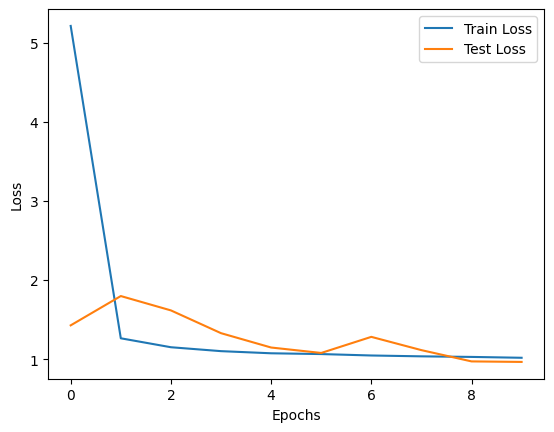

In [ ]:
#plotting the loss
plt.plot(train_loss_list, label='Train Loss')
plt.plot(test_loss_list, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Dropout and regularization

In [ ]:
model = nn.Sequential(
    nn.Linear(input_size, 1024),
    nn.Tanh(),
    nn.Dropout(0.2),
    nn.Linear(1024, 512),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Linear(128, out_size),
)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)
l1_weight = 0.001

In [ ]:
train_loss_list = []
test_loss_list = []

epochs = 10
for epoch in range(epochs):
    train_loss = 0
    model.train()
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)

        #L1 regularization
        l1_parameters = []
        for parameter in model.parameters():
            l1_parameters.append(parameter.view(-1))
        loss += l1_weight * torch.abs(torch.cat(l1_parameters)).sum()

        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    avg_train_loss = train_loss / len(trainloader)
    train_loss_list.append(avg_train_loss)

    test_loss = 0
    model.eval()
    with torch.no_grad():
        for images, labels in testloader:
            images = images.view(images.shape[0], -1)
            outputs = model(images)
            loss = criterion(outputs, labels)

            #L1 regularization
            l1_parameters = []
            for parameter in model.parameters():
                l1_parameters.append(parameter.view(-1))
            loss += l1_weight * torch.abs(torch.cat(l1_parameters)).sum()

            test_loss += loss.item()
        avg_test_loss = test_loss / len(testloader)
        test_loss_list.append(avg_test_loss)

    print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {avg_train_loss:.4f}, Test Loss: {avg_test_loss:.4f}")

Epoch [1/10], Train Loss: 5.1873, Test Loss: 1.4018
Epoch [2/10], Train Loss: 1.3533, Test Loss: 1.2585
Epoch [3/10], Train Loss: 1.2563, Test Loss: 1.1350
Epoch [4/10], Train Loss: 1.2147, Test Loss: 1.1374
Epoch [5/10], Train Loss: 1.1945, Test Loss: 1.4476
Epoch [6/10], Train Loss: 1.1724, Test Loss: 1.2534
Epoch [7/10], Train Loss: 1.1685, Test Loss: 1.1245
Epoch [8/10], Train Loss: 1.1507, Test Loss: 1.0970
Epoch [9/10], Train Loss: 1.1405, Test Loss: 1.1891
Epoch [10/10], Train Loss: 1.1368, Test Loss: 1.0780


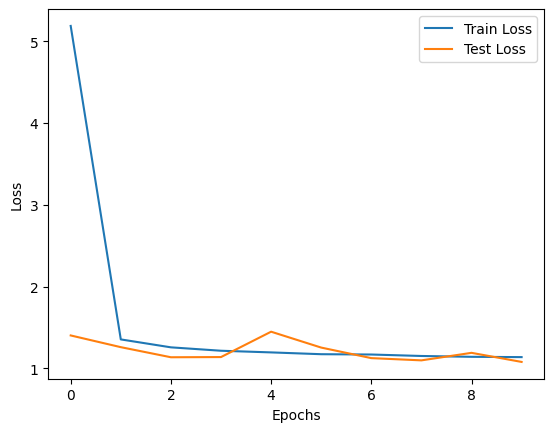

In [ ]:
#plotting the loss
plt.plot(train_loss_list, label='Train Loss')
plt.plot(test_loss_list, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## All three

In [ ]:
model = nn.Sequential(
    nn.Linear(input_size, 1024),
    nn.Tanh(),
    nn.Dropout(0.2),
    nn.Linear(1024, 512),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Linear(128, out_size),
)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)
l1_weight = 0.001

In [ ]:
train_loss_list = []
test_loss_list = []

epochs = 10
for epoch in range(epochs):
    train_loss = 0
    model.train()
    for images, labels in augmented_trainloader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)

        #L1 regularization
        l1_parameters = []
        for parameter in model.parameters():
            l1_parameters.append(parameter.view(-1))
        loss += l1_weight * torch.abs(torch.cat(l1_parameters)).sum()

        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    avg_train_loss = train_loss / len(augmented_trainloader)
    train_loss_list.append(avg_train_loss)

    test_loss = 0
    model.eval()
    with torch.no_grad():
        for images, labels in testloader:
            images = images.view(images.shape[0], -1)
            outputs = model(images)
            loss = criterion(outputs, labels)

            #L1 regularization
            l1_parameters = []
            for parameter in model.parameters():
                l1_parameters.append(parameter.view(-1))
            loss += l1_weight * torch.abs(torch.cat(l1_parameters)).sum()

            test_loss += loss.item()
        avg_test_loss = test_loss / len(testloader)
        test_loss_list.append(avg_test_loss)

    print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {avg_train_loss:.4f}, Test Loss: {avg_test_loss:.4f}")

Epoch [1/10], Train Loss: 5.3097, Test Loss: 1.4868
Epoch [2/10], Train Loss: 1.5122, Test Loss: 1.3208
Epoch [3/10], Train Loss: 1.4225, Test Loss: 1.4796
Epoch [4/10], Train Loss: 1.3845, Test Loss: 1.2346
Epoch [5/10], Train Loss: 1.3660, Test Loss: 1.2021
Epoch [6/10], Train Loss: 1.3522, Test Loss: 1.2043
Epoch [7/10], Train Loss: 1.3415, Test Loss: 1.2004
Epoch [8/10], Train Loss: 1.3271, Test Loss: 1.2165
Epoch [9/10], Train Loss: 1.3178, Test Loss: 1.3124
Epoch [10/10], Train Loss: 1.3096, Test Loss: 1.2243


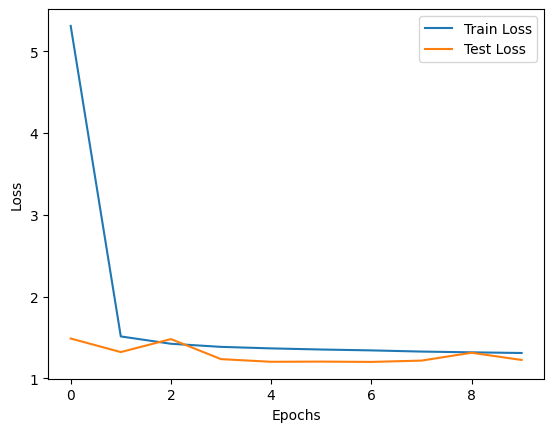

In [ ]:
#plotting the loss
plt.plot(train_loss_list, label='Train Loss')
plt.plot(test_loss_list, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()